In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os

In [2]:
path = os.getcwd() + '/data/'

In [3]:
df = pd.read_csv(path+'preprocessed.csv')

In [4]:
df

,Unnamed: 0,Area,Country code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,ASEAN,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
0,66,Afghanistan,AFG,2001,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Clean,GW,0.19,0.00,0.00
1,67,Afghanistan,AFG,2001,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Fossil,GW,0.03,0.00,0.00
2,68,Afghanistan,AFG,2001,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Gas and Other Fossil,GW,0.03,0.00,0.00
3,69,Afghanistan,AFG,2001,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",GW,0.19,0.00,0.00
4,70,Afghanistan,AFG,2001,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Renewables,GW,0.19,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142409,345017,Zimbabwe,ZWE,2022,Country,Africa,Africa,0.0,0.0,0.0,0.0,0.0,Power sector emissions,Aggregate fuel,Renewables,mtCO2,0.16,0.02,14.29
142410,345019,Zimbabwe,ZWE,2022,Country,Africa,Africa,0.0,0.0,0.0,0.0,0.0,Power sector emissions,CO2 intensity,CO2 intensity,gCO2/kWh,297.87,27.18,10.04
142411,345021,Zimbabwe,ZWE,2022,Country,Africa,Africa,0.0,0.0,0.0,0.0,0.0,Power sector emissions,Fuel,Coal,mtCO2,2.50,0.35,16.28
142412,345023,Zimbabwe,ZWE,2022,Country,Africa,Africa,0.0,0.0,0.0,0.0,0.0,Power sector emissions,Fuel,Hydro,mtCO2,0.14,0.00,0.00


In [5]:
# Filter the DataFrame for relevant categories and subcategories
categories = ['Electricity demand', 'Electricity generation', 'Power sector emissions']
subcategories = ['Total', 'Demand', 'CO2 intensity']

df_filtered = df[(df['Category'].isin(categories)) & (df['Subcategory'].isin(subcategories))]

# Pivot the data to have countries as rows and features as columns
df_pivot = df_filtered.pivot_table(values='Value', index='Area', columns=['Category', 'Subcategory'])

# Flatten column names
df_pivot.columns = [f"{cat}_{subcat}" for cat, subcat in df_pivot.columns]

# Drop any rows with missing values
df_pivot = df_pivot.dropna()

In [6]:
# Normalize the data
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_pivot)

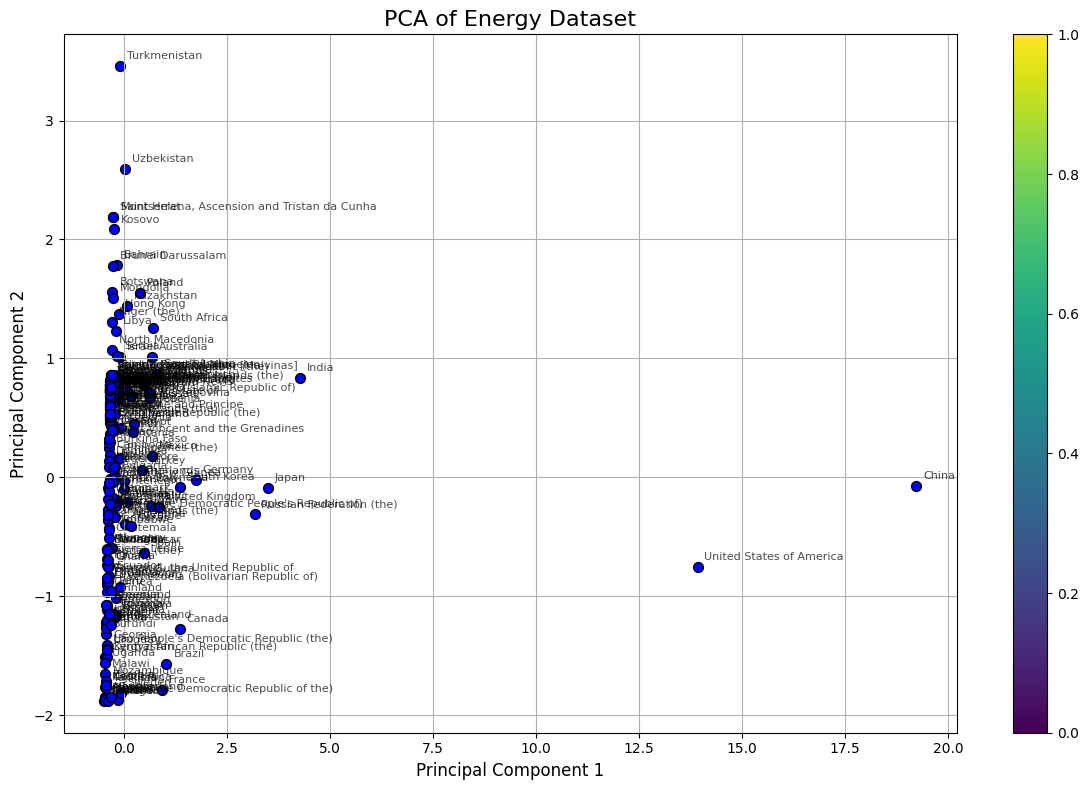

In [7]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_normalized)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Country'] = df_pivot.index

# Visualize the PCA results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c='blue', edgecolor='k', s=50)

# Annotate points with country names
for idx, row in pca_df.iterrows():
    plt.annotate(row['Country'], (row['Principal Component 1'], row['Principal Component 2']), 
                 xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)
plt.title('PCA of Energy Dataset', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)

# Add a colorbar legend
plt.colorbar(scatter)

plt.tight_layout()
plt.show()


In [8]:
# Print explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Total Variance Explained: {sum(explained_variance):.2f}")

# Print feature importance
feature_importance = pd.DataFrame({
    'feature': df_pivot.columns,
    'importance': pca.components_[0]
})
print("\nFeature Importance for PC1:")
print(feature_importance.sort_values('importance', ascending=False))

Explained Variance Ratio: [0.74516926 0.24894117]
Total Variance Explained: 0.99

Feature Importance for PC1:
                                feature  importance
1          Electricity generation_Total    0.577399
0             Electricity demand_Demand    0.577398
3          Power sector emissions_Total    0.574655
2  Power sector emissions_CO2 intensity    0.054708
